# Installs, Imports and API Keys

In [1]:
!pip install -U langchain-community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 39.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.6/455.6 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.7/412.7 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 333.3/333.3 kB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 53.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from transformers import GPT2TokenizerFast
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import FAISS
from langchain.chains.question_answering import load_qa_chain
from langchain.llms import OpenAI
from langchain.chains import ConversationalRetrievalChain

In [5]:
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

In [7]:
# print(OPENAI_API_KEY)

# Loading PDFs/Docx and chunking with LangChain

In [8]:
!pip install python-docx transformers langchain
!pip install textract==1.6.3



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
  Using cached six-1.12.0-py2.py3-none-any.whl.metadata (1.9 kB)
Using cached six-1.12.0-py2.py3-none-any.whl (10 kB)
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0

[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [9]:
!pip install pdfplumber
!pip install pytesseract
!sudo apt install tesseract-ocr-eng


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 21.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 12.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pdfminer.six
    Found existing installation: pdfminer.six 20181108
    Uninstalling pdfminer.six-20181108:
      Successfully uninstalled pdfminer.six-20181108
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
textract 1.6.3 requires pdfminer.six==20181108, but you have pdfminer-six 20231228 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [11]:
import os
import re
import textract
import pdfplumber
import pytesseract
from PIL import Image
import docx
from transformers import GPT2TokenizerFast
from langchain.text_splitter import RecursiveCharacterTextSplitter

# Initialize tokenizer
tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")

# Function to count tokens
def count_tokens(text: str) -> int:
    return len(tokenizer.encode(text))

# Function to remove URLs from text
def remove_urls(text: str) -> str:
    url_pattern = r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"
    return re.sub(url_pattern, '', text)

# Function to remove headers, footers, page numbers, and publication notices
def remove_unnecessary_content(text: str) -> str:
    lines = text.split("\n")
    cleaned_lines = []

    for line in lines:
        line = line.strip()

        # Remove page numbers (standalone numbers)
        if re.match(r'^\s*\d+\s*$', line):
            continue

        # Remove known repetitive headers/footers
        if any(phrase in line.lower() for phrase in [
            "social security administration", "socialsecurity.gov",
            "publication no", "printed on recycled paper",
            "produced and published at u.s. taxpayer expense",
            "contacting us", "call us toll-free", "tty",
            "apply for most types of benefits"
        ]):
            continue

        # Remove excessive whitespace and artifacts
        if line:
            cleaned_lines.append(line)

    return "\n".join(cleaned_lines)

# Function to extract text from PDFs (including OCR for images)
def extract_text_from_pdf(pdf_path: str) -> str:
    text = ""

    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            extracted_text = page.extract_text()
            if extracted_text:
                text += extracted_text + "\n"
            else:
                # If no text found, extract from images using OCR
                image = page.to_image()
                img = image.original
                ocr_text = pytesseract.image_to_string(img)
                text += ocr_text + "\n"

    return text.strip()

# Function to extract text from DOCX
def extract_text_from_docx(docx_path: str) -> str:
    doc = docx.Document(docx_path)
    text = []
    for para in doc.paragraphs:
        text.append(para.text)
    return '\n'.join(text)

# Function to clean and normalize text
def clean_text(text: str) -> str:
    text = text.strip()
    text = remove_urls(text)  # Remove URLs
    text = remove_unnecessary_content(text)  # Remove headers/footers, page numbers, etc.
    return text

# Function to save processed text into a new folder
def save_text_to_file(text: str, output_folder: str, filename: str):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    output_path = os.path.join(output_folder, f"{filename}.txt")

    with open(output_path, 'w', encoding='utf-8') as f:
        f.write(text)

    print(f"Text saved to: {output_path}")

# Function to process all files in the "data" folder
def process_files_in_folder(folder_path: str, output_folder: str):
    chunks = []

    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        if filename.endswith(".pdf"):
            print(f"Processing PDF: {filename}")
            text = extract_text_from_pdf(file_path)

        elif filename.endswith(".docx"):
            print(f"Processing DOCX: {filename}")
            text = extract_text_from_docx(file_path)

        else:
            continue

        # Clean the extracted text
        cleaned_text = clean_text(text)

        # Save the cleaned text to a file
        save_text_to_file(cleaned_text, output_folder, filename)

        # Split text into chunks for retrieval
        text_splitter = RecursiveCharacterTextSplitter(
            chunk_size=512,
            chunk_overlap=24,
            length_function=count_tokens,
        )

        document_chunks = text_splitter.create_documents([cleaned_text])
        chunks.extend(document_chunks)  # Add chunks to the list

    return chunks

# Specify folders
folder_path = './Input_data_files'
output_folder = './output_texts'

# Process the files and get the cleaned chunks
document_chunks = process_files_in_folder(folder_path, output_folder)

# Print summary
print(f"Processed {len(document_chunks)} chunks from the files in the folder.")


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Processing DOCX: Code of Federal Regulations - F1.docx
Text saved to: ./output_texts/Code of Federal Regulations - F1.docx.txt
Processing PDF: Policy -Form i-20.pdf


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Text saved to: ./output_texts/Policy -Form i-20.pdf.txt
Processing DOCX: STEM OPT.docx
Text saved to: ./output_texts/STEM OPT.docx.txt
Processing PDF: How to find form category.pdf
Text saved to: ./output_texts/How to find form category.pdf.txt
Processing PDF: FQA - F1 Visa General Info.pdf
Text saved to: ./output_texts/FQA - F1 Visa General Info.pdf.txt
Processing DOCX: Relevant Information About F.docx
Text saved to: ./output_texts/Relevant Information About F.docx.txt
Processing PDF: Policy - Use for electronic Signatures.pdf


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Text saved to: ./output_texts/Policy - Use for electronic Signatures.pdf.txt
Processing PDF: Policy - Flight Training .pdf


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Text saved to: ./output_texts/Policy - Flight Training .pdf.txt
Processing DOCX: Processing Time .docx
Text saved to: ./output_texts/Processing Time .docx.txt
Processing PDF: Policy - The Form I-20 and the English Proficiency Field.pdf
Text saved to: ./output_texts/Policy - The Form I-20 and the English Proficiency Field.pdf.txt
Processing PDF: Policy Guidance Practical Training .pdf
Text saved to: ./output_texts/Policy Guidance Practical Training .pdf.txt
Processing PDF: Premium Form - I-907.pdf
Text saved to: ./output_texts/Premium Form - I-907.pdf.txt
Processing PDF: i-765 Instructions.pdf
Text saved to: ./output_texts/i-765 Instructions.pdf.txt
Processing PDF: PostCompletionOPTPlanningTool_June24.pdf
Text saved to: ./output_texts/PostCompletionOPTPlanningTool_June24.pdf.txt
Processing DOCX: Optional Practice Training - OPT .docx
Text saved to: ./output_texts/Optional Practice Training - OPT .docx.txt
Processing PDF: Student and Exchange Visitor Program and Designated School Officia

<Figure size 1000x600 with 0 Axes>

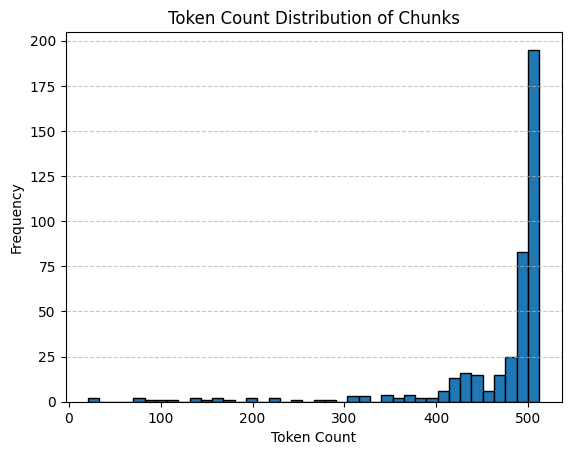

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a list of token counts
token_counts = [count_tokens(chunk.page_content) for chunk in document_chunks]

# Create a DataFrame from the token counts
df = pd.DataFrame({'Token Count': token_counts})

# Create a histogram of the token count distribution
plt.figure(figsize=(10, 6))
df.hist(bins=40, grid=False, edgecolor='black')

# Customize the plot
plt.title('Token Count Distribution of Chunks')
plt.xlabel('Token Count')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


#Embedding

In [ ]:
!pip install pinecone-client


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.8/244.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.8 MB/s eta 0:00:00


In [ ]:
import pinecone

# Initialize Pinecone
pinecone.init(api_key="YOUR_API_KEY", environment="us-west1-gcp")  # Replace with your environment


In [ ]:
!pip install sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer

# Load pre-trained sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Create embeddings for document chunks
embeddings = [model.encode(chunk.page_content) for chunk in document_chunks]


# Embedding

In [ ]:
# !pip install pinecone-client

In [ ]:
from pinecone import Pinecone, ServerlessSpec

PINECONE_API_KEY = os.getenv("PINECONE_API_KEY")
PINECONE_ENVIRONMENT = "us-east-1"

# Initialize a Pinecone client with your API key
pc = Pinecone(api_key=PINECONE_API_KEY, environment=PINECONE_ENVIRONMENT )

In [ ]:
# !pip install sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer

# Load pre-trained sentence transformer model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Create embeddings for document chunks
embeddings = [model.encode(chunk.page_content) for chunk in document_chunks]


# Store to VectorDB

In [ ]:
# Create a Pinecone index (if not already created)
INDEX_NAME = "text-embeddings"
if INDEX_NAME not in pc.list_indexes():
    pc.create_index(
        name=INDEX_NAME,
        dimension=384,  # Ensuring the correct dimension
        metric="cosine",
        spec=ServerlessSpec(cloud="aws", region="us-east-1")  # Modify region as needed
    )

In [ ]:
# Connect to the index
index = pc.Index(INDEX_NAME)
print(pc.list_indexes())

In [ ]:
# Store in Pinecone
upsert_data = [(str(i), embeddings[i]) for i in range(len(embeddings))]
index.upsert(vectors=upsert_data)

# **#Irrelevant yet don't delete**

# 2. Embed text and store embeddings

In [ ]:
# Get embedding model
embeddings = OpenAIEmbeddings()

# Create vector database
db = FAISS.from_documents(chunks, embeddings)

# 3. Setup retrieval function

In [ ]:
# Check similarity search is working
query = "Who created transformers?"
docs = db.similarity_search(query)
docs[0]

Document(page_content='7 Conclusion\n\nIn this work, we presented the Transformer, the ﬁrst sequence transduction model based entirely on\nattention, replacing the recurrent layers most commonly used in encoder-decoder architectures with\nmulti-headed self-attention.\nFor translation tasks, the Transformer can be trained signiﬁcantly faster than architectures based\non recurrent or convolutional layers. On both WMT 2014 English-to-German and WMT 2014\nEnglish-to-French translation tasks, we achieve a new state of the art. In the former task our best\nmodel outperforms even all previously reported ensembles.\nWe are excited about the future of attention-based models and plan to apply them to other tasks. We\nplan to extend the Transformer to problems involving input and output modalities other than text and\nto investigate local, restricted attention mechanisms to efﬁciently handle large inputs and outputs\nsuch as images, audio and video. Making generation less sequential is another re

In [ ]:
# Create QA chain to integrate similarity search with user queries (answer query from knowledge base)

chain = load_qa_chain(OpenAI(temperature=0), chain_type="stuff")

query = "Who created transformers?"
docs = db.similarity_search(query)

chain.run(input_documents=docs, question=query)

' Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Łukasz Kaiser, and Illia Polosukhin created transformers.'

# 5. Create chatbot with chat memory (OPTIONAL)

In [ ]:
from IPython.display import display
import ipywidgets as widgets

# Create conversation chain that uses our vectordb as retriver, this also allows for chat history management
qa = ConversationalRetrievalChain.from_llm(OpenAI(temperature=0.1), db.as_retriever())

In [ ]:
chat_history = []

def on_submit(_):
    query = input_box.value
    input_box.value = ""

    if query.lower() == 'exit':
        print("Thank you for using the State of the Union chatbot!")
        return

    result = qa({"question": query, "chat_history": chat_history})
    chat_history.append((query, result['answer']))

    display(widgets.HTML(f'<b>User:</b> {query}'))
    display(widgets.HTML(f'<b><font color="blue">Chatbot:</font></b> {result["answer"]}'))

print("Welcome to the Transformers chatbot! Type 'exit' to stop.")

input_box = widgets.Text(placeholder='Please enter your question:')
input_box.on_submit(on_submit)

display(input_box)

Welcome to the Transformers chatbot! Type 'exit' to stop.


Text(value='', placeholder='Please enter your question:')

HTML(value='<b>User:</b> Who created transformers?')

HTML(value='<b><font color="blue">Chatbot:</font></b>  Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkor…

HTML(value='<b>User:</b> Were they smart?')

HTML(value='<b><font color="blue">Chatbot:</font></b>  I don\'t know.')

HTML(value='<b>User:</b> I think they were')

HTML(value='<b><font color="blue">Chatbot:</font></b>  Yes, I think they were smart.')